PART 2
Multivariate Regression Implementation

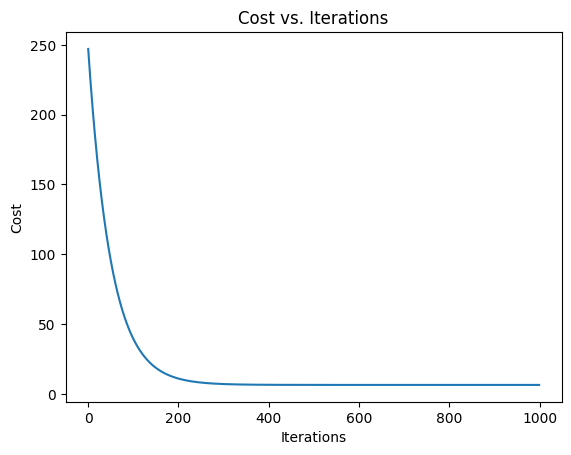

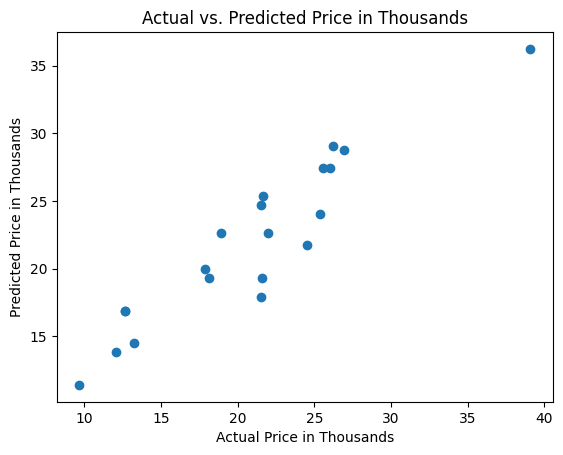

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset for cars
cars_data = pd.read_csv("cars.csv")

# Function to normalize features
def normalize_features(X):
    return (X - X.mean()) / X.std()

# Function to initialize parameters (weights and bias)
def initialize_parameters(num_features):
    # Initialize weights to zeros and bias to zero
    theta = np.zeros((num_features, 1))
    return theta

# Function to compute the cost (loss) function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    squared_errors = np.square(predictions - y)
    J = (1 / (2 * m)) * np.sum(squared_errors)
    return J

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    for i in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Function to plot predicted vs. actual values
def plot_predicted_vs_actual(y_actual, y_predicted):
    plt.scatter(y_actual, y_predicted)
    plt.xlabel("Actual Price in Thousands")
    plt.ylabel("Predicted Price in Thousands")
    plt.title("Predicted vs. Actual Values")
    plt.show()

# Function to plot accuracy across different random states
def plot_accuracy_across_random_states(X, y, learning_rate, num_iterations, num_random_states):
    accuracy_scores = []
    for random_state in range(num_random_states):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
        
        # Normalize features
        X_train_normalized = normalize_features(X_train)
        X_test_normalized = normalize_features(X_test)
        
        # Add bias term (intercept)
        X_train_normalized_with_bias = np.c_[np.ones((X_train_normalized.shape[0], 1)), X_train_normalized]
        X_test_normalized_with_bias = np.c_[np.ones((X_test_normalized.shape[0], 1)), X_test_normalized]
        
        # Initialize parameters
        num_features = X_train_normalized_with_bias.shape[1]
        theta = initialize_parameters(num_features)
        
        # Perform gradient descent
        theta, _ = gradient_descent(X_train_normalized_with_bias, y_train, theta, learning_rate, num_iterations)
        
        # Compute accuracy (R-squared)
        predictions = np.dot(X_test_normalized_with_bias, theta)
        accuracy = 1 - np.sum((y_test - predictions)**2) / np.sum((y_test - np.mean(y_test))**2)
        accuracy_scores.append(accuracy)
    
    plt.plot(range(num_random_states), accuracy_scores, marker='o')
    plt.xlabel("Random State")
    plt.ylabel("Accuracy (R-squared)")
    plt.title("Accuracy Across Different Random States")
    plt.show()

# Function to plot learning curve
def plot_learning_curve(cost_history):
    plt.plot(range(len(cost_history)), cost_history)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost (Mean Squared Error)")
    plt.title("Learning Curve")
    plt.show()

# Feature selection
selected_features = ["Horsepower"]
X = cars_data[selected_features].values
y = cars_data["Price in Thousands"].values.reshape(-1, 1)

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000
num_random_states = 10  # Number of random states for accuracy verification

# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
X_train_normalized = normalize_features(X_train)
X_test_normalized = normalize_features(X_test)

# Add bias term (intercept)
X_train_normalized_with_bias = np.c_[np.ones((X_train_normalized.shape[0], 1)), X_train_normalized]
X_test_normalized_with_bias = np.c_[np.ones((X_test_normalized.shape[0], 1)), X_test_normalized]

# Initialize parameters
num_features = X_train_normalized_with_bias.shape[1]
theta = initialize_parameters(num_features)

# Perform gradient descent
theta, cost_history = gradient_descent(X_train_normalized_with_bias, y_train, theta, learning_rate, num_iterations)

# Predictions
predictions = np.dot(X_test_normalized_with_bias, theta)

# Plot predicted vs. actual values
plot_predicted_vs_actual(y_test, predictions)

# Plot accuracy across different random states
plot_accuracy_across_random_states(X, y, learning_rate, num_iterations, num_random_states)

# Plot learning curve
plot_learning_curve(cost_history)


PART 3
Manual K-Fold Cross Validation Implementation

In [7]:
import numpy as np
import pandas as pd

# Load the preprocessed dataset for cars
cars_data = pd.read_csv("cars.csv")

# Function to normalize features
def normalize_features(X):
    return (X - X.mean()) / X.std()

# Function to initialize parameters (weights and bias)
def initialize_parameters(num_features):
    # Initialize weights to zeros and bias to zero
    theta = np.zeros((num_features, 1))
    return theta

# Function to compute the cost (loss) function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X, theta)
    squared_errors = np.square(predictions - y)
    J = (1 / (2 * m)) * np.sum(squared_errors)
    return J

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    for i in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1 / m) * np.dot(X.T, errors)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Function to perform K-Fold Cross-Validation
def k_fold_cross_validation(X, y, k, learning_rate, num_iterations):
    m = len(y)
    fold_size = m // k
    mse_scores = []
    
    for fold in range(k):
        # Split data into training and validation sets for this fold
        start_idx = fold * fold_size
        end_idx = (fold + 1) * fold_size
        
        X_train = np.concatenate((X[:start_idx], X[end_idx:]), axis=0)
        y_train = np.concatenate((y[:start_idx], y[end_idx:]), axis=0)
        
        X_val = X[start_idx:end_idx]
        y_val = y[start_idx:end_idx]
        
        # Normalize features
        X_train_normalized = normalize_features(X_train)
        X_val_normalized = normalize_features(X_val)
        
        # Add bias term (intercept)
        X_train_normalized_with_bias = np.c_[np.ones((X_train_normalized.shape[0], 1)), X_train_normalized]
        X_val_normalized_with_bias = np.c_[np.ones((X_val_normalized.shape[0], 1)), X_val_normalized]
        
        # Initialize parameters
        num_features = X_train_normalized_with_bias.shape[1]
        theta = initialize_parameters(num_features)
        
        # Perform gradient descent
        theta, _ = gradient_descent(X_train_normalized_with_bias, y_train, theta, learning_rate, num_iterations)
        
        # Compute mean squared error for this fold
        predictions = np.dot(X_val_normalized_with_bias, theta)
        mse = np.mean(np.square(predictions - y_val))
        mse_scores.append(mse)
        
    return np.mean(mse_scores)

# Feature selection
# Here, we'll select features Price in Thousands (target) and Horsepower
selected_features = ["Horsepower"]
X = cars_data[selected_features].values
y = cars_data["Price in Thousands"].values.reshape(-1, 1)

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000
k = 5  # Number of folds for cross-validation

# Perform K-Fold Cross-Validation
mse_score = k_fold_cross_validation(X, y, k, learning_rate, num_iterations)

print("Mean Squared Error (MSE) across {} folds: {:.4f}".format(k, mse_score))


Mean Squared Error (MSE) across 5 folds: 17.4457


PART 4
Comparison with Built-in Python Libraries

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Load the preprocessed dataset for cars
cars_data = pd.read_csv("cars.csv")

# Feature selection
selected_features = ["Horsepower"]
X = cars_data[selected_features].values
y = cars_data["Price in Thousands"].values.reshape(-1, 1)

# Implement Multivariate Regression using scikit-learn
model_lr = LinearRegression()
model_lr.fit(X, y)

# Predictions
predictions_lr = model_lr.predict(X)

# Compute mean squared error (MSE)
mse_lr = mean_squared_error(y, predictions_lr)

print("Mean Squared Error (MSE) using scikit-learn Linear Regression: {:.4f}".format(mse_lr))

# Implement K-Fold Cross-Validation using scikit-learn
cv_scores = cross_val_score(model_lr, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()

print("Mean Squared Error (MSE) using scikit-learn K-Fold Cross-Validation: {:.4f}".format(mse_cv))


Mean Squared Error (MSE) using scikit-learn Linear Regression: 11.5348
Mean Squared Error (MSE) using scikit-learn K-Fold Cross-Validation: 12.3493
